## Instruction;
1. target; is_safe
2. feature; nitrates, nitrites,radium
3. Missing value treatment 
4. Data split to train:test = 80% : 20%, random_state=0, stratify=y
5. Create Decision Tree model, test the accuracy of the model to predict(max_depth = 2, criterion='gini')

In [1]:
import pandas as pd 
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.tree import plot_tree
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler

import warnings
warnings.filterwarnings("ignore")

In [47]:
df = pd.read_csv('waterQuality1.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7999 entries, 0 to 7998
Data columns (total 21 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   aluminium    7999 non-null   float64
 1   ammonia      7999 non-null   object 
 2   arsenic      7999 non-null   float64
 3   barium       7999 non-null   float64
 4   cadmium      7999 non-null   float64
 5   chloramine   7999 non-null   float64
 6   chromium     7999 non-null   float64
 7   copper       7999 non-null   float64
 8   flouride     7999 non-null   float64
 9   bacteria     7999 non-null   float64
 10  viruses      7999 non-null   float64
 11  lead         7999 non-null   float64
 12  nitrates     7999 non-null   float64
 13  nitrites     7999 non-null   float64
 14  mercury      7999 non-null   float64
 15  perchlorate  7999 non-null   float64
 16  radium       7999 non-null   float64
 17  selenium     7999 non-null   float64
 18  silver       7999 non-null   float64
 19  uraniu

<AxesSubplot:xlabel='aluminium', ylabel='bacteria'>

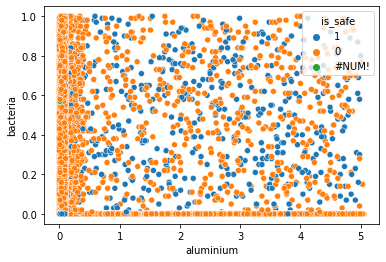

In [63]:
sns.scatterplot(x = 'aluminium', y='bacteria', data=df, hue='is_safe')

In [40]:
df.head()

,aluminium,ammonia,arsenic,barium,cadmium,chloramine,chromium,copper,flouride,bacteria,...,lead,nitrates,nitrites,mercury,perchlorate,radium,selenium,silver,uranium,is_safe
0,1.65,9.08,0.04,2.85,0.007,0.35,0.83,0.17,0.05,0.20,...,0.054,16.08,1.13,0.007,37.75,6.78,0.08,0.34,0.02,1
1,2.32,21.16,0.01,3.31,0.002,5.28,0.68,0.66,0.90,0.65,...,0.100,2.01,1.93,0.003,32.26,3.21,0.08,0.27,0.05,1
2,1.01,14.02,0.04,0.58,0.008,4.24,0.53,0.02,0.99,0.05,...,0.078,14.16,1.11,0.006,50.28,7.07,0.07,0.44,0.01,0
3,1.36,11.33,0.04,2.96,0.001,7.23,0.03,1.66,1.08,0.71,...,0.016,1.41,1.29,0.004,9.12,1.72,0.02,0.45,0.05,1
4,0.92,24.33,0.03,0.20,0.006,2.67,0.69,0.57,0.61,0.13,...,0.117,6.74,1.11,0.003,16.90,2.41,0.02,0.06,0.02,1


In [42]:
df = df.drop(index=[7551,7568,7890], axis=0)
df['is_safe']=df['is_safe'].astype(float)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7996 entries, 0 to 7998
Data columns (total 21 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   aluminium    7996 non-null   float64
 1   ammonia      7996 non-null   object 
 2   arsenic      7996 non-null   float64
 3   barium       7996 non-null   float64
 4   cadmium      7996 non-null   float64
 5   chloramine   7996 non-null   float64
 6   chromium     7996 non-null   float64
 7   copper       7996 non-null   float64
 8   flouride     7996 non-null   float64
 9   bacteria     7996 non-null   float64
 10  viruses      7996 non-null   float64
 11  lead         7996 non-null   float64
 12  nitrates     7996 non-null   float64
 13  nitrites     7996 non-null   float64
 14  mercury      7996 non-null   float64
 15  perchlorate  7996 non-null   float64
 16  radium       7996 non-null   float64
 17  selenium     7996 non-null   float64
 18  silver       7996 non-null   float64
 19  uraniu

In [43]:
df.corr()

,aluminium,arsenic,barium,cadmium,chloramine,chromium,copper,flouride,bacteria,viruses,lead,nitrates,nitrites,mercury,perchlorate,radium,selenium,silver,uranium,is_safe
aluminium,1.000000,0.225725,0.294091,-0.099902,0.369221,0.353134,0.168569,-0.009877,-0.078324,-0.071040,0.020957,-0.003851,0.237439,-0.003129,0.362986,0.243396,-0.003651,0.334923,0.014723,0.333974
arsenic,0.225725,1.000000,0.362925,0.334782,0.356509,0.312421,-0.036488,0.003731,0.035642,0.011596,-0.087669,0.027533,0.305113,-0.015288,0.332228,0.218328,-0.006993,0.307794,0.001469,-0.123362
barium,0.294091,0.362925,1.000000,-0.037901,0.446869,0.415937,0.065277,-0.018637,0.101304,-0.002429,-0.042829,-0.011423,0.312783,0.006165,0.462207,0.286890,0.035222,0.431542,-0.002541,0.090858
cadmium,-0.099902,0.334782,-0.037901,1.000000,-0.144366,-0.157716,-0.109252,0.005005,-0.092133,0.021255,-0.035313,0.020232,-0.015829,-0.016169,-0.149269,-0.098936,0.009933,-0.155441,-0.005911,-0.256034
chloramine,0.369221,0.356509,0.446869,-0.144366,1.000000,0.555846,0.118975,0.004254,0.154443,0.003432,-0.030241,-0.001619,0.379916,-0.021198,0.588683,0.389119,0.011435,0.522372,-0.007648,0.186704
chromium,0.353134,0.312421,0.415937,-0.157716,0.555846,1.000000,0.113003,-0.002424,0.141937,0.002193,-0.050254,-0.012843,0.335940,-0.022541,0.524432,0.315484,0.030598,0.510705,-0.005472,0.182306
copper,0.168569,-0.036488,0.065277,-0.109252,0.118975,0.113003,1.000000,0.011647,0.149271,0.006183,0.121762,0.002259,0.162092,0.017785,0.104527,0.026534,-0.003356,0.089241,0.006802,0.029498
flouride,-0.009877,0.003731,-0.018637,0.005005,0.004254,-0.002424,0.011647,1.000000,0.013984,0.018261,0.012146,-0.008245,-0.016591,-0.004263,-0.016352,0.007683,0.022726,0.014446,0.016849,0.006550
bacteria,-0.078324,0.035642,0.101304,-0.092133,0.154443,0.141937,0.149271,0.013984,1.000000,0.618535,-0.027179,-0.033993,0.246463,-0.004406,0.147526,0.099080,-0.006779,0.148199,0.045077,-0.022077
viruses,-0.071040,0.011596,-0.002429,0.021255,0.003432,0.002193,0.006183,0.018261,0.618535,1.000000,0.017886,-0.044621,-0.091364,0.011728,0.002965,-0.019955,-0.035013,0.011680,0.058473,-0.097040


#### From the dataset we only using Aluminium, Barium, and is_safe column.

In [65]:
df = df[['aluminium', 'bacteria', 'is_safe']]
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7999 entries, 0 to 7998
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   aluminium  7999 non-null   float64
 1   bacteria   7999 non-null   float64
 2   is_safe    7999 non-null   object 
dtypes: float64(2), object(1)
memory usage: 187.6+ KB


#### Handling inappropriate data, as the is_safe contains NUM value, we have to remove it(removal is chosen since the affected row is minimum;3)

In [66]:
df[df['is_safe']=='#NUM!']

,aluminium,bacteria,is_safe
7551,0.03,0.00,#NUM!
7568,0.06,0.00,#NUM!
7890,0.01,0.57,#NUM!


In [67]:
df = df.drop(index=[7551,7568,7890], axis=0)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7996 entries, 0 to 7998
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   aluminium  7996 non-null   float64
 1   bacteria   7996 non-null   float64
 2   is_safe    7996 non-null   object 
dtypes: float64(2), object(1)
memory usage: 249.9+ KB


In [68]:
df['is_safe']=df['is_safe'].astype(float)

In [69]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7996 entries, 0 to 7998
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   aluminium  7996 non-null   float64
 1   bacteria   7996 non-null   float64
 2   is_safe    7996 non-null   float64
dtypes: float64(3)
memory usage: 249.9 KB


<AxesSubplot:xlabel='aluminium', ylabel='bacteria'>

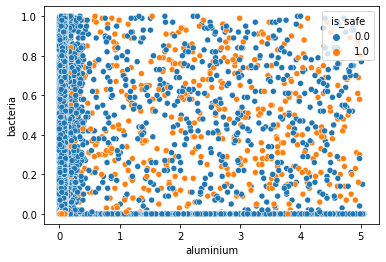

In [70]:
sns.scatterplot(x = 'aluminium', y='bacteria', data=df, hue='is_safe')

##### Data Splitting and defining the model

In [71]:
feature = ['aluminium', 'bacteria']
target = ['is_safe']

X=df[feature]
y=df[target] 

In [72]:
X_test, X_train, y_test, y_train = train_test_split(
    X,
    y,
    stratify=y,
    test_size=0.2,
    random_state=0
)

In [76]:
tree = DecisionTreeClassifier(max_depth=2, criterion='gini')

##### Without Scalling

In [77]:
y_pred_tree = tree.fit(X_train, y_train).predict(X_test)

In [78]:
print('Model accuracy in test dataset:', accuracy_score(y_test, y_pred_tree))

Model accuracy in test dataset: 0.8858661663539712


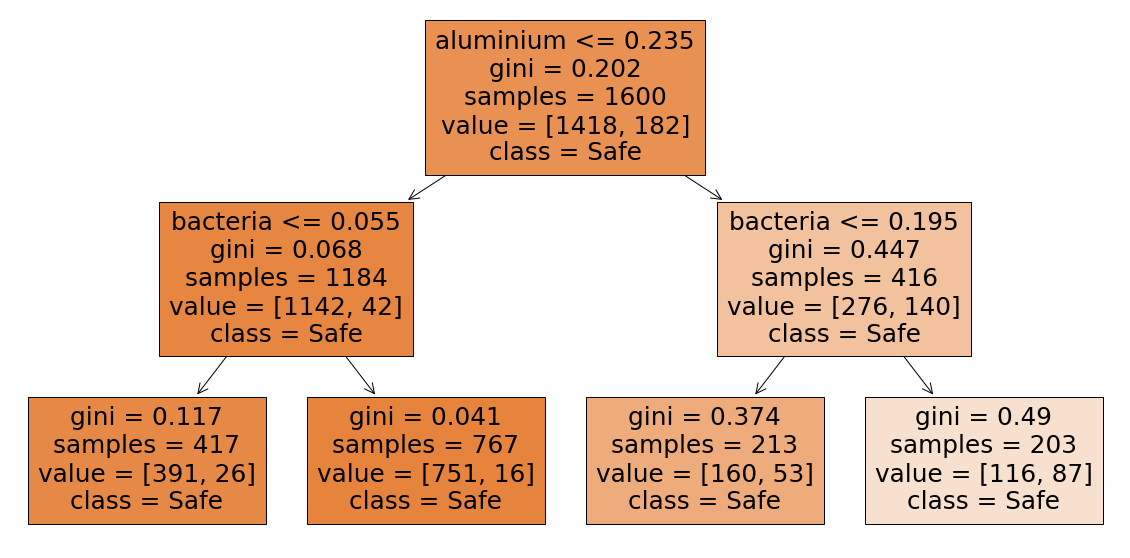

In [79]:
# Tree plot
plt.figure(figsize=(20, 10))
plot_tree(tree, feature_names= list(X), class_names= ['Safe', 'Not safe'], filled=True);

##### With Scaling

In [80]:
scaler = MinMaxScaler()
scaler.fit(X_train)

X_train_tree_scaled = scaler.transform(X_train)
X_test_tree_scaled = scaler.transform(X_test)

In [81]:
y_pred_tree_scaled = tree.fit(X_train_tree_scaled, y_train).predict(X_test_tree_scaled)

In [82]:
print('Model accuracy in test dataset with scaling:', accuracy_score(y_test, y_pred_tree_scaled))

Model accuracy in test dataset with scaling: 0.8858661663539712


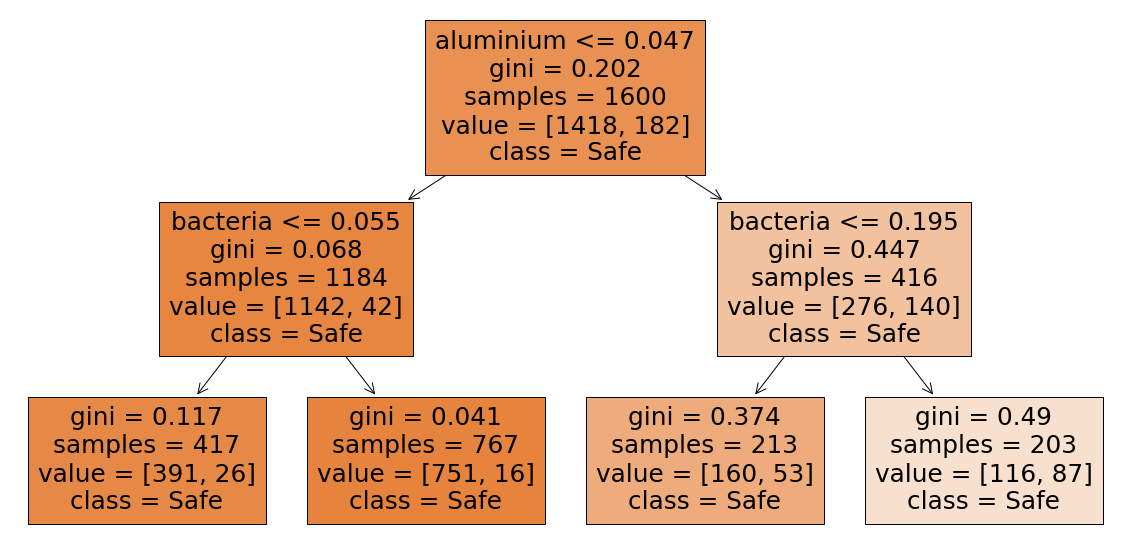

In [85]:
plt.figure(figsize=(20, 10))
plot_tree(tree, feature_names= list(X), class_names= ['Safe', 'Not safe'], filled=True)
plt.show()

##### Model using scaling and no max_depth defined

In [86]:
tree2 = DecisionTreeClassifier(criterion='gini')
y_pred_tree2 = tree2.fit(X_train_tree_scaled, y_train).predict(X_test_tree_scaled)

In [88]:
print('Model accuracy in test dataset:', accuracy_score(y_test, y_pred_tree2))

Model accuracy in test dataset: 0.8547529706066291
